Using data augmentation to train on a small dataset 

In [1]:
import os, shutil
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models, optimizers
from tensorflow.keras.applications import VGG16
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imageio

In [9]:
base_dir = 'C:\\Users\\abc\\Desktop\\Datasets\\TwoCelebFaces'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
#test_dir = os.path.join(base_dir, 'test')

train_ben_dir = os.path.join(train_dir, 'ben_afflek')
train_elton_dir = os.path.join(train_dir, 'elton_john')
validation_ben_dir = os.path.join(validation_dir, 'ben_afflek')
validation_elton_dir = os.path.join(validation_dir, 'elton_john')
#test_cats_dir = os.path.join(test_dir, 'cats')
#test_dogs_dir = os.path.join(test_dir, 'dogs')

In [11]:
print('total training Ben Afflek images:', len(os.listdir(train_ben_dir)))
print('total training Elton John images:', len(os.listdir(train_elton_dir)))
print('total validation Ben Afflek images:', len(os.listdir(validation_ben_dir)))
print('total validation Elton John images:', len(os.listdir(validation_elton_dir)))

total training Ben Afflek images: 0
total training Elton John images: 0
total validation Ben Afflek images: 0
total validation Elton John images: 0


C:\Users\abc\Desktop\Datasets\TwoCelebFaces\benandelton\ben-1.jpg


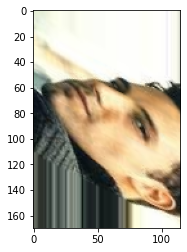

In [12]:
original_dataset_dir = 'C:\\Users\\abc\\Desktop\\Datasets\\TwoCelebFaces\\benandelton'
file_sample = os.path.join(original_dataset_dir, os.listdir(original_dataset_dir)[0])
print(file_sample)
img = plt.imread(file_sample)
data_generator = ImageDataGenerator()
tr_img = data_generator.apply_transform(img, {'theta': 90., 'shear': 30})
plt.imshow(tr_img)

In [14]:
ben_files = ['ben-{}.jpg'.format(i) for i in range(1, 15)]
data_generator = ImageDataGenerator()
for file in ben_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)
    
    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(train_ben_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)
    
    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(train_ben_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)
    
    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(train_ben_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)
    
    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(train_ben_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)
    
    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(train_ben_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)


OSError: JPEG does not support alpha channel.

In [15]:
elton_files = ['elton-{}.jpg'.format(i) for i in range(1, 18)]
data_generator = ImageDataGenerator()
for file in elton_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)
    
    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(train_elton_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)
    
    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(train_elton_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)
    
    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(train_elton_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)
    
    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(train_elton_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)
    
    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(train_elton_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)

In [59]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 17, 17, 128)      

In [61]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [62]:
print('total training Ben Afflek images:', len(os.listdir(train_ben_dir)))
print('total training Elton John images:', len(os.listdir(train_elton_dir)))
print('total validation Ben Afflek images:', len(os.listdir(validation_ben_dir)))
print('total validation Elton John images:', len(os.listdir(validation_elton_dir)))

total training Ben Afflek images: 128
total training Elton John images: 172
total validation Ben Afflek images: 5
total validation Elton John images: 5


In [63]:
train_datagen =  ImageDataGenerator(
rescale=1./255,
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=5, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=2, class_mode='binary')

Found 300 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


data batch shape: (5, 150, 150, 3)
labels batch shape: (5,)
[1. 0. 0. 0. 1.]


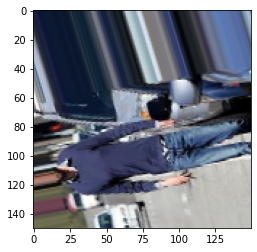

In [64]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    plt.imshow(data_batch[1])
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch)
    break

In [65]:
history = model.fit(
train_generator,
steps_per_epoch=30,
epochs=10,
validation_data=validation_generator, validation_steps=3)

Train for 30 steps, validate for 3 steps
Epoch 1/10
30/30 [==============================] - 12s 397ms/step - loss: 0.7174 - acc: 0.5200 - val_loss: 0.7034 - val_acc: 0.3333
Epoch 2/10
30/30 [==============================] - 11s 361ms/step - loss: 0.6784 - acc: 0.5733 - val_loss: 0.7124 - val_acc: 0.5000
Epoch 3/10
30/30 [==============================] - 10s 346ms/step - loss: 0.6464 - acc: 0.6333 - val_loss: 0.7350 - val_acc: 0.5000
Epoch 4/10
30/30 [==============================] - 11s 352ms/step - loss: 0.5926 - acc: 0.6400 - val_loss: 0.7865 - val_acc: 0.5000
Epoch 5/10
30/30 [==============================] - 11s 381ms/step - loss: 0.5606 - acc: 0.7267 - val_loss: 0.8408 - val_acc: 0.3333
Epoch 6/10
30/30 [==============================] - 14s 470ms/step - loss: 0.4915 - acc: 0.7333 - val_loss: 0.9444 - val_acc: 0.5000
Epoch 7/10
30/30 [==============================] - 11s 351ms/step - loss: 0.4334 - acc: 0.8133 - val_loss: 1.0731 - val_acc: 0.5000
Epoch 8/10
30/30 [==========

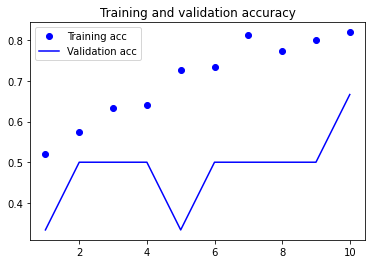

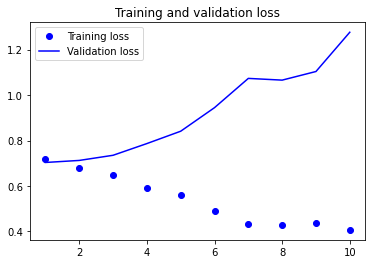

In [67]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()